In [1]:
import numpy as np
import pandas as pd

In [2]:
#reading loan data
input_loan_data = pd.read_csv("housing_loan_data.csv")
print("Shape of input data is :", input_loan_data.shape)

Shape of input data is : (307511, 122)


In [3]:
#fill NAN rows
input_na_rows_filled = input_loan_data.dropna()
print(input_na_rows_filled.isnull().values.any())
print("Shape of input data is :", input_na_rows_filled.shape)

False
Shape of input data is : (8602, 122)


In [4]:
#check if there are still any NAN rows
non_null_data = input_na_rows_filled.notnull()
print("Shape of input data is :", non_null_data.shape)
print(input_na_rows_filled.isnull().values.any())

Shape of input data is : (8602, 122)
False


number of payers is  526  number of defaulters is  8076
Proportion of defaulters to payers: 15.35 : 1


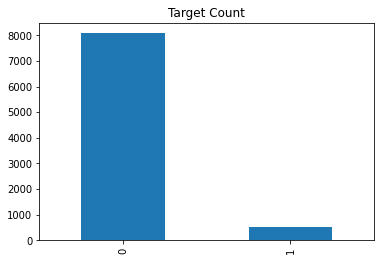

In [5]:
#check for imbalanced data
target_column = input_na_rows_filled["TARGET"]
target_count = target_column.value_counts()
print("number of payers is ", target_count[1], " number of defaulters is ", target_count[0])
print('Proportion of defaulters to payers:', round(target_count[0] / target_count[1], 2), ': 1')
target_count.plot(kind='bar', title='Target Count');

In [6]:
#Encoding string columns to int columns
print(input_na_rows_filled.isnull().values.any())

for columns in input_na_rows_filled.columns:
    if (input_na_rows_filled[columns].dtype == "object"):
        (input_na_rows_filled[columns], uniques) = pd.factorize(input_na_rows_filled[columns])

print(input_na_rows_filled.dtypes)
print(input_na_rows_filled.isnull().values.any())

False
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              int64
CODE_GENDER                     int64
FLAG_OWN_CAR                    int64
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object
False


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [7]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing

#dividing X and Y in data
X = np.array(input_na_rows_filled.iloc[:, input_na_rows_filled.columns != 'TARGET'])
Y = np.array(input_na_rows_filled.iloc[:, input_na_rows_filled.columns == 'TARGET'])
print("X_data size is ", X.shape, " Y_data size is ", Y.shape)

min_max_scaler = preprocessing.MinMaxScaler()
X_normalized = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X_normalized)

ros = RandomOverSampler()
X_ros, Y_ros = ros.fit_sample(X, Y)
print("Shape of X_ros is ", X_ros.shape, "Shape of Y_ros is ", Y_ros.shape)


Using TensorFlow backend.


X_data size is  (8602, 121)  Y_data size is  (8602, 1)
Shape of X_ros is  (16152, 121) Shape of Y_ros is  (16152,)


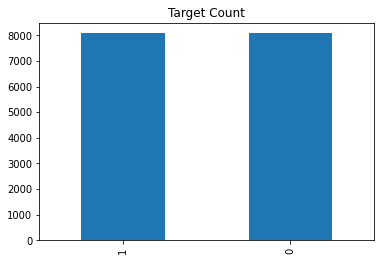

In [8]:
count_after_oversampling = pd.Series(Y_ros).value_counts()
count_after_oversampling.plot(kind='bar', title='Target Count');


In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
principalComponents = pca.fit_transform(X_ros)
X_ros = principalComponents
principalDf = pd.DataFrame(principalComponents)
print(principalDf.head)

<bound method NDFrame.head of              0         1         2         3         4         5         6   \
0     -0.171180 -0.260412 -0.268841 -0.431088  0.598883 -0.190181  0.005954   
1     -0.594137  0.042454 -0.576920  0.207156 -0.030022  0.048092 -0.072956   
2      1.593672  1.225180 -0.770527  0.235978  0.740256  1.194938  1.121259   
3      0.382142  0.951398  0.330425 -0.668058  0.748926  0.119200  0.284713   
4      0.554821  0.549595  0.173732 -0.294433  1.282695  0.760384 -0.586854   
...         ...       ...       ...       ...       ...       ...       ...   
16147 -0.257189 -0.271818 -0.279205 -0.379871  0.435894 -0.223419 -0.079122   
16148 -0.180649 -0.188993  0.277503 -0.680475  0.303527  0.601707 -0.139564   
16149 -0.460450 -0.240145  0.208532 -0.644674 -0.115283 -0.864159  0.400857   
16150 -0.592130  0.035001 -0.551037  0.163148  0.017281  0.092034  0.146167   
16151  0.756556 -0.862850 -0.477737 -0.133231 -0.347893 -0.158502 -0.084231   

             7       

In [10]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

#Splitting training and testing data
(X_train, X_Test, Y_train, Y_Test) = train_test_split(X_ros, Y_ros, test_size = 0.33)
print(X_train.shape)
print(X_train[1:100])

#Defining our DL model
model = tf.keras.models.Sequential()

#input layer
model.add(tf.keras.layers.Reshape((100,),input_shape = (100,)))
model.add(tf.keras.layers.BatchNormalization())

#hidden layers
model.add(tf.keras.layers.Dense(10, activation = "relu"))
model.add(tf.keras.layers.Dense(8, activation = "relu"))
model.add(tf.keras.layers.Dense(8, activation = "relu"))

#output layer
model.add(tf.keras.layers.Dense(1, activation = "sigmoid"))

#compiling the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=["accuracy"])

(10821, 100)
[[ 6.52231902e-01 -4.87181021e-01  3.11628542e-01 ... -4.63591669e-04
   8.25865177e-05  2.20320116e-04]
 [-5.49913395e-01  1.91068377e-01 -1.14743001e-01 ...  8.39310152e-04
   4.84601367e-04 -7.65840319e-04]
 [ 6.91205407e-03  1.56107809e-01 -4.63325653e-01 ... -7.08418975e-04
  -2.51128577e-03 -9.18283714e-04]
 ...
 [ 1.05684839e+00 -4.35524569e-01 -6.00252531e-01 ...  9.93099847e-04
  -2.94882939e-03 -7.26746234e-04]
 [ 1.04796984e+00 -3.91273422e-01 -9.13012846e-02 ... -1.83127781e-04
  -2.54861330e-03  4.90637943e-04]
 [-6.70006515e-01  2.86056898e-03 -5.57240018e-01 ... -3.30549528e-04
   1.26747651e-03 -3.45025035e-05]]


In [11]:
#es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

model.fit(X_train, Y_train, 
          validation_data = (X_Test, Y_Test),
          epochs = 500,
          batch_size = 200)

Train on 10821 samples, validate on 5331 samples
Epoch 1/500
10821/10821 [==============================] - 1s 79us/sample - loss: 0.6955 - accuracy: 0.5353 - val_loss: 0.6906 - val_accuracy: 0.5164
Epoch 2/500
10821/10821 [==============================] - 0s 12us/sample - loss: 0.6670 - accuracy: 0.6100 - val_loss: 0.6739 - val_accuracy: 0.6143
Epoch 3/500
10821/10821 [==============================] - 0s 12us/sample - loss: 0.6334 - accuracy: 0.6583 - val_loss: 0.6436 - val_accuracy: 0.6376
Epoch 4/500
10821/10821 [==============================] - 0s 11us/sample - loss: 0.5937 - accuracy: 0.6932 - val_loss: 0.6079 - val_accuracy: 0.6732
Epoch 5/500
10821/10821 [==============================] - 0s 11us/sample - loss: 0.5607 - accuracy: 0.7219 - val_loss: 0.5856 - val_accuracy: 0.6976
Epoch 6/500
10821/10821 [==============================] - 0s 11us/sample - loss: 0.5358 - accuracy: 0.7385 - val_loss: 0.5677 - val_accuracy: 0.7154
Epoch 7/500
10821/10821 [==========================

In [12]:
model.save("house_loan_90_percent.h5")

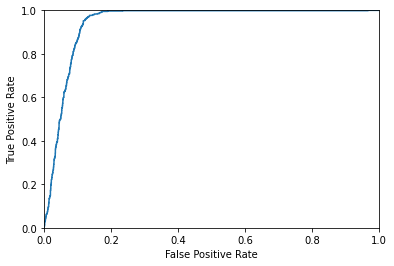

In [13]:
#Plotting roc auc curve to analyze the performance of model
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

#predict the outcomes on Test data:
y_test_predicted = model.predict(X_Test)

fpr , tpr , thresholds = roc_curve ( Y_Test , y_test_predicted)


plt.plot(fpr,tpr) 
plt.axis([0,1,0,1]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.show() 


In [14]:
#computing auc score
auc_score=roc_auc_score(Y_Test,y_test_predicted) 

print("AUC score for the model obtained is: ", auc_score)

AUC score for the model obtained is:  0.9437900315846757
